# Repaso - Módulo 2

---
## Problema 1.1. Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [1]:
import numpy as np

def montecarlo1(f, a, b, N) :
    u = np.random.uniform(a, b, size=N)
    return np.mean(f(u))*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x) :
    return np.sqrt(1 + x**4)

def f2(x) :
    return np.log(np.log(x))

def f3(x) :
    return 1/np.log(x)

def f4(x) :
    return np.exp(-x**2/2)

In [6]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(index=N, columns=["f1", "f2", "f3", "f4"])
tabla

,f1,f2,f3,f4
10.0,NaN,NaN,NaN,NaN
100.0,NaN,NaN,NaN,NaN
1000.0,NaN,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN
100000.0,NaN,NaN,NaN,NaN


In [7]:
a = 4
b = 5
for n in N :
    tabla.loc[n, "f1"] = montecarlo1(f1, a, b, int(n))
    tabla.loc[n, "f2"] = montecarlo1(f2, a, b, int(n))
    tabla.loc[n, "f3"] = montecarlo1(f3, a, b, int(n))
    tabla.loc[n, "f4"] = montecarlo1(f4, a, b, int(n))
    
tabla

,f1,f2,f3,f4
10.0,19.5324,0.393622,0.678806,8.08362e-05
100.0,20.5122,0.409012,0.669442,6.55155e-05
1000.0,20.4081,0.405714,0.666899,7.5127e-05
10000.0,20.3789,0.405592,0.667209,7.74401e-05
100000.0,20.3664,0.405888,0.666925,7.84389e-05


## Problema 1.2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [9]:
def region(x, y) :
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

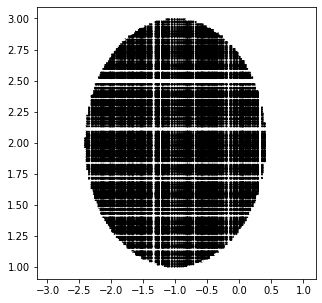

In [12]:
a1, b1 = -3, 1
a2, b2 = 1, 3

x = np.random.uniform(a1, b1, size=300)
y = np.random.uniform(a2, b2, size=300)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, c=~region(X, Y), cmap="gray", s=1)

In [20]:
def montecarlo2(region, a1, b1, a2, b2, N) :
    x = np.random.uniform(a1, b1, size=N)
    y = np.random.uniform(a2, b2, size=N)
    AR = (b1-a1)*(b2-a2)
    B = region(x, y)
    return np.mean(B)*AR

In [18]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(index=N, columns=["Area"])
tabla

,Area
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN
100000.0,NaN


In [21]:
for n in N :
    tabla.loc[n, "Area"] = montecarlo2(region, a1, b1, a2, b2, int(n))
tabla

,Area
10.0,2.4
100.0,4.56
1000.0,4.48
10000.0,4.4296
100000.0,4.44392


---
## Problema 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [ ]:
import pandas as pd
import numpy as np

In [22]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [24]:
x = [0]
y = [0]

for i in range(100000) :
    k = np.random.choice(df.index, p=df["$p_i$"])
    a = df["$a_i$"][k]
    b = df["$b_i$"][k]
    c = df["$c_i$"][k]
    d = df["$d_i$"][k]
    e = df["$e_i$"][k]
    f = df["$f_i$"][k]
    
    xn = a*x[-1] + b*y[-1] + e
    yn = c*x[-1] + d*y[-1] + f
    x.append(xn)
    y.append(yn)
    
    

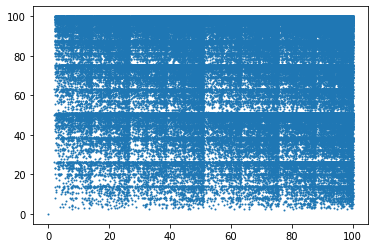

In [25]:
plt.figure()
plt.scatter(x, y, s=1)

---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [27]:
import pandas_datareader.data as web

In [28]:
names = ["AAPL", "MSFT"]
start = "2015-01-01"
end   = "2019-12-31"

def getClose(name, start, end) :
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data = getClose(names, start, end)
data.head()

Symbols,AAPL,MSFT
Date,,
2015-01-02,24.714504,41.108837
2015-01-05,24.018261,40.730808
2015-01-06,24.020523,40.132984
2015-01-07,24.357340,40.642887
2015-01-08,25.293209,41.838524


<AxesSubplot:xlabel='Date'>

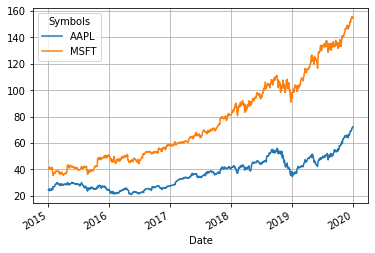

In [29]:
data.plot(grid=True)

Calcule los rendimientos diarios junto con sus características estadísticas

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>]], dtype=object)

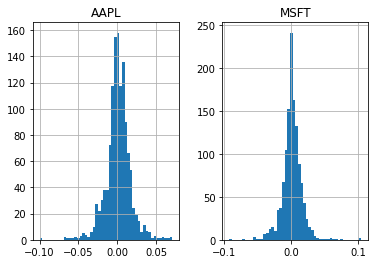

In [31]:
R = ((data - data.shift())/data.shift()).dropna()
R.hist(bins=50)

In [32]:
R.describe()

Symbols,AAPL,MSFT
count,1257.000000,1257.000000
mean,0.000976,0.001161
std,0.015646,0.014686
min,-0.099608,-0.092533
25%,-0.005856,-0.005401
50%,0.000894,0.000868
75%,0.008918,0.008054
max,0.070422,0.104522


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [33]:
media_AAPL = R["AAPL"].mean()
std_AAPL = R["AAPL"].std()
media_AAPL, std_AAPL

(0.0009763166574183743, 0.015646090170970576)

In [34]:
media_MSFT = R["MSFT"].mean()
std_MSFT = R["MSFT"].std()
media_MSFT, std_MSFT

(0.001160904676907767, 0.014685820304590867)

<AxesSubplot:>

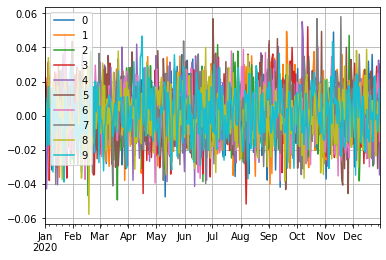

In [41]:
def simR(names, means, stds, start, dias, N) :
    sims = {}
    fechas = pd.date_range(start, periods=dias)
    for name, mean, std in zip(names, means, stds) :
        R_sim = np.random.normal(mean, std, size=(dias, N))
        sims[name] = pd.DataFrame(data=R_sim, index=fechas)
    return sims

names = ["AAPL",     "MSFT"]
means = [media_AAPL, media_MSFT]
stds =  [std_AAPL,   std_MSFT]

sims = simR(names, means, stds, "2020-01-01", 365, 10)
sims["AAPL"].plot(grid=True)

In [45]:
sims = simR(names, means, stds, "2020-01-01", 365, 1000)
sims["AAPL"] = (sims["AAPL"] + 1).cumprod()*data["AAPL"].iloc[-1]
sims["MSFT"] = (sims["MSFT"] + 1).cumprod()*data["MSFT"].iloc[-1]
sims["MSFT"].head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,151.679960,152.666427,154.936360,153.587673,151.659953,154.461588,155.336338,154.102972,153.477805,156.597123,...,153.402210,153.299007,151.944046,153.145992,155.128552,154.681897,154.734906,153.900161,154.764913,157.371727
2020-01-02,154.359334,152.245968,157.845300,152.637672,148.144473,153.308906,155.261831,154.054028,152.115318,160.564499,...,152.441411,148.427986,154.892043,150.358274,157.044261,156.774070,157.958061,152.112509,158.208903,154.156008
2020-01-03,155.724848,153.738925,158.753507,153.623383,148.348895,158.799789,157.739766,155.811975,152.699079,161.205716,...,151.869163,145.667778,156.285080,151.898026,155.594166,155.768328,154.479863,152.582332,155.131238,155.905520
2020-01-04,157.530879,155.969598,157.444159,154.221585,148.013483,159.179654,153.421400,157.164145,149.120911,161.233875,...,150.547193,142.137800,158.011048,153.101129,151.342921,152.836479,153.924386,152.469933,156.350053,154.687274
2020-01-05,157.232701,155.064303,159.108602,157.688382,149.259621,160.496252,153.114898,155.962690,147.557168,163.281923,...,150.090327,138.511432,158.815782,149.944716,150.769615,153.423608,150.645924,150.861692,157.980997,155.137031


Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [47]:
valor_deseado_AAPL = data["AAPL"].iloc[-1]*1.2
valor_deseado_MSFT = data["MSFT"].iloc[-1]*1.2

B_AAPL = sims["AAPL"] >= valor_deseado_AAPL
B_MSFT = sims["MSFT"] >= valor_deseado_MSFT

B_AAPL

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,False,True,True,False,True,False,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
2020-12-27,False,True,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2020-12-28,False,True,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2020-12-29,False,True,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

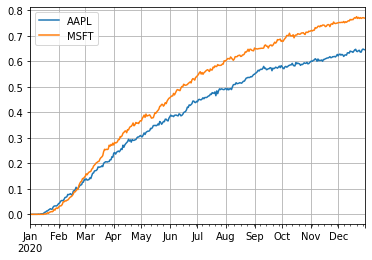

In [55]:
P_AAPL = B_AAPL.mean(axis=1)
P_AAPL.columns = ["AAPL"]
P_MSFT = B_MSFT.mean(axis=1)
P_MSFT.columns = ["MSFT"]


data2 = pd.DataFrame(index=pd.date_range("2020-01-01", 365), columns=["AAPL", "MSFT"])
data2["AAPL"] = P_AAPL
data2["MSFT"] = P_MSFT
data2.plot(grid=True)

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

In [56]:
data_2020 = getClose("AAPL", "2020-01-01", "2020-12-31")
data_2020.head()

Date
2020-01-02    73.894325
2020-01-03    73.175934
2020-01-06    73.759003
2020-01-07    73.412125
2020-01-08    74.593048
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

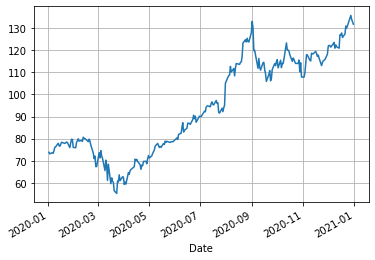

In [57]:
data_2020.plot(grid=True)

<AxesSubplot:>

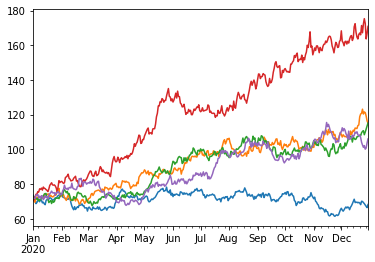

In [70]:
sims["AAPL"][5].plot()
sims["AAPL"][6].plot()
sims["AAPL"][7].plot()
sims["AAPL"][8].plot()
sims["AAPL"][9].plot()